# Модуль 17. Практическая работа

## Цели работы

1. Познакомиться с фреймворком PyTorch, закрепить навыки из видео.
1. Обучить простую полносвязную нейронную сеть, которая решает задачу регрессии.

## Что нужно сделать

1. Загрузите датасет `california_housing` из пакета `sklearn.datasets`.
1. Разделите датасет на тренировочную и тестовую выборки. 
1. Реализуйте абстракцию доступа к тренировочным данным на основе `torch.utils.data.Dataset` и `torch.utils.data.DataLoader`. 
1. Соберите нейронную сеть из слоёв пакета torch.nn.
1. Создайте экзепляры классов для функции потерь (`torch.nn.MSELoss`) и оптимизатора (`torch.optim.Adam`).
1. Реализуйте тренировочный цикл.
1. Вычислите значение функции потерь на тестовой выборке после каждой каждой эпохи и сохраните его в Python-список.
1. После завершения тренировочного цикла нарисуйте график зависимости функции потерь на тестовой выборке от количества эпох обучения.

## Что оценивается

Это задание с самопроверкой, сдавать его не нужно. Просто сверьтесь с решением в конце ноутбука.

## Информация о задаче

### Описание датасета 

Набор данных, описывающий среднюю стоимость дома в округах Калифорнии. Целевая переменная — медианная стоимость дома в 100 000 долларов США в 1990 году, независимые переменные – характеристики дома:

1. MedInc: медианный доход жильцов домов в квартале.
1. HouseAge: средний возраст дома в квартале.
1. AveRooms: среднее количество комнат.
1. AveBedrms: среднее количество спален. 
1. Population: число жильцов в квартале.
1. AveOccup: среднее число жильцов в квартире.
1. Latitude: широта центра квартала.
1. Longitude: долгота центра квартала.

Данные в датасете имеют разный масштаб. Например, обычно количество комнат в доме невелико, а население в расчёте на группу домов (квартал) — велико. Более того, большинство признаков должны быть положительными, а долгота — отрицательной (потому что речь идёт о Калифорнии). 

### Порядок выполнения задания

1. Ниже приведены семь ячеек с кодом, в котором есть недостающие фрагменты. 
1. Такие фрагменты выделены комментарием `# ВАШ КОД ЗДЕСЬ`. Ориентируйтесь на комментарии в коде. Они поясняют задания, где это необходимо. 
1. Заполните недостаюшие фрагменты так, чтобы семь ячеек, запущенные по порядку, приводили к обучению нейронной сети, которая решает задачу регрессии и предсказывает стоимость дома в Калифорнии по восьми характеристикам. Качество обучения контролируйте с помощью графика функции потерь на тестовой выборке, которая рассчитывается в конце каждой тренировочной эпохи. Если всё сделаете правильно, получится убывающий тренд: ошибка должна падать с ростом числа эпох. 

Опционально:

1. Экспериментируйте. Меняйте гиперпараметры модели: архитектуру сети, размер батча, число эпох и learning rate. Если интересно, можете поменять оптимизатор. По-умолчанию исплользуем [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (вариация градиентного спуска, которая адаптивно подстраивает learning rate) – в этой задаче этот численный алгоритм хорошо работает и быстро сходится. Замените его на классический стохастический градиентный спуск [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html), сходимость почти наверняка упадёт. Меняйте всё что хотите, наблюдайте, как это сказывается на качестве обучения. Так нарабатывается профессиональная интуиция и опыт.  
1. Подумайте, как улучшить модель. Например, в описании датасета неспроста указано, что данные в нём разного масштаба. Попробуйте привести их к одному масштабу, проверьте сходимость обучения. Это должно сработать.   




In [1]:
# ЯЧЕЙКА 1

import numpy as np

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [2]:
# ЯЧЕЙКА 2 

d = fetch_california_housing()
X, y = d.data, d.target

# Разделение данных на тренировочную и тестовую выборки. Используйте соотношение 80/20
#
RS = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)# ВАШ КОД ЗДЕСЬ


In [3]:
# ЯЧЕЙКА 3 

class MyDataset(Dataset):
  #
  # Определите конструктор и методы __getitem__ и __len__
  # Сделайте всё в точности так, как мы делали в видео

    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.X.shape[0]

# Инициализируем тренировочный torch.dataset
train_dataset = MyDataset(X_train, y_train)

# Преобразуем тестовую выборку в torch-тензоры всю целиком
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [5]:
# ЯЧЕЙКА 4

# Пусть размер батча у нас равен 16
batch_size = 128

# Создайте Dataloader для тренировочной выборки на основе экземпляра train_dataset
# Делайте как в видео, размер батча – batch_size
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

In [13]:
# ЯЧЕЙКА 5

# Создайте нейронную сеть, которая состоит 
# из одного входного, трёх скрытых и одного выходного слоя 
# Архитектура сети такая:
#
# RegressionNet(
#   (hidden1): Linear(in_features=8, out_features=24, bias=True)
#   (f1): ReLU()
#   (hidden2): Linear(in_features=24, out_features=12, bias=True)
#   (f2): ReLU()
#   (hidden3): Linear(in_features=12, out_features=6, bias=True)
#   (f3): ReLU()
#   (output): Linear(in_features=6, out_features=1, bias=True)
# )
#
# Другими словами, во входном слое восемь нейронов (по числу независимых переменных 
# в датасете), в первом скрытом – 24 нейрона, во втором скрытом – 12, в третьем 
# скрытом – шесть, и в выходном слое – всего один нейрон. Функции активации всюду – ReLU.
# У входного слоя функции активации нет, у единственного нейрона выходного слоя – тоже
# нет 
#
# Определите для функции сети метод forward, который последовательно применяет 
# к входным данным слои сети и функции активации 
#   
class RegressionNet(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super().__init__()
        self.hidden1 = nn.Linear(in_features=input_dim, out_features=hidden_dims[0], bias=True)
        self.f1 = nn.ReLU()
        
        self.hidden2 = nn.Linear(in_features=hidden_dims[0], out_features=hidden_dims[1], bias=True)
        self.f2 = nn.ReLU()
        
        self.hidden3 = nn.Linear(in_features=hidden_dims[1], out_features=hidden_dims[2], bias=True)
        self.f3 = nn.ReLU()
        
        self.output = nn.Linear(in_features=hidden_dims[2], out_features=output_dim, bias=True)
        
    def forward(self, X):
        X = self.f1(self.hidden1(X))
        X = self.f2(self.hidden2(X))
        X = self.f3(self.hidden3(X))
        return self.output(X)

# Объявляем экземпляр класса нейронной сети
model = RegressionNet(8, (24, 12, 6), 1)

# Должен напечатать следующее:
#
# RegressionNet(
#   (hidden1): Linear(in_features=8, out_features=24, bias=True)
#   (f1): ReLU()
#   (hidden2): Linear(in_features=24, out_features=12, bias=True)
#   (f2): ReLU()
#   (hidden3): Linear(in_features=12, out_features=6, bias=True)
#   (f3): ReLU()
#   (output): Linear(in_features=6, out_features=1, bias=True)
# )
#
print(model)

RegressionNet(
  (hidden1): Linear(in_features=8, out_features=24, bias=True)
  (f1): ReLU()
  (hidden2): Linear(in_features=24, out_features=12, bias=True)
  (f2): ReLU()
  (hidden3): Linear(in_features=12, out_features=6, bias=True)
  (f3): ReLU()
  (output): Linear(in_features=6, out_features=1, bias=True)
)


In [14]:
# ЯЧЕЙКА 6

# Создайте объект класса, который реализует среднеквадратичную ошибку (MSE).
loss_fn = nn.MSELoss()  # ВАШ КОД ЗДЕСЬ

# Создаём оптимизатор. Тут будем использовать вариацию стохастического 
# градиентного спуска Adam. Это адаптивный алгоритм, который выбирает
# шаг изменения весов (learning rate) в зависимости от текущей ситуации. 
# Это очень эффективный алгоритм, который в большинстве случаев работает 
# лучше, чем обычный градиентный спуск с постоянным шагом. В этой задаче – 
# точно лучше. Если хотите убедиться, замените Adam на torch.optim.SDG
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Делаем 100 эпох
num_epochs = 100

# Сюда будем сохранять значение функции потерь на тестовой выборке
# после каждой эпохи обучения
loss_test = []
loss_train = []

# Реализуйте тренировочный цикл
for i in range(num_epochs):  # ВАШ КОД ЗДЕСЬ
  for X, y in train_dataloader:  # ВАШ КОД ЗДЕСЬ
    
   # Реализуйте все шаги тренировочного цикла PyTorch
   #
   # ВАШ КОД ЗДЕСЬ
   #
    pred = model(X)
    loss = loss_fn(pred, y.unsqueeze(-1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  loss_tr = loss_fn(pred, y.unsqueeze(-1))
  loss_train.append(loss_tr.item())

  with torch.no_grad():
    # Конец эпохи: считаем функцию потерь на тестовой выборке, 
    # сохраняем в список, чтобы потом нарисовать график
    loss = loss_fn(
        model(X_test_tensor),
        y_test_tensor.unsqueeze(-1)
    ).item()
    loss_test.append(loss)
    print(f'epoch {i} loss_train {loss_tr}    loss {loss}')

epoch 0 loss_train 6.253783226013184    loss 6.834954738616943
epoch 1 loss_train 1.9980058670043945    loss 1.8548434972763062
epoch 2 loss_train 1.3581604957580566    loss 1.454803705215454
epoch 3 loss_train 1.2931760549545288    loss 1.3758809566497803
epoch 4 loss_train 1.2867964506149292    loss 1.333125352859497
epoch 5 loss_train 1.1798434257507324    loss 1.3335144519805908
epoch 6 loss_train 1.0914521217346191    loss 1.2829349040985107
epoch 7 loss_train 1.5947492122650146    loss 1.2613192796707153
epoch 8 loss_train 1.1947697401046753    loss 1.2360385656356812
epoch 9 loss_train 1.1596901416778564    loss 1.2231791019439697
epoch 10 loss_train 1.2756177186965942    loss 1.1996031999588013
epoch 11 loss_train 1.142594337463379    loss 1.1926007270812988
epoch 12 loss_train 1.2338645458221436    loss 1.1700947284698486
epoch 13 loss_train 1.2429386377334595    loss 1.1727107763290405
epoch 14 loss_train 1.2075568437576294    loss 1.1369082927703857
epoch 15 loss_train 1.129

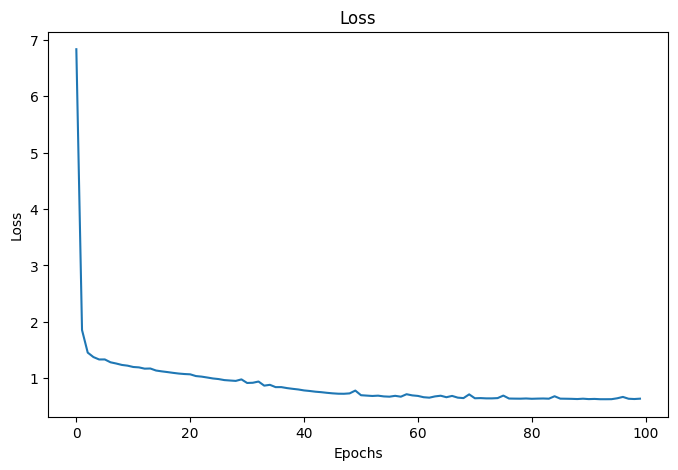

In [15]:
# ЯЧЕЙКА 7

step = np.arange(0, num_epochs)

fig, ax = plt.subplots(figsize=(8,5))

# Рисуем зависимость ошибки от эпохи обучения
plt.plot(step, np.array(loss_test))

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Решение для самоконтроля 

In [ ]:
# ЯЧЕЙКА 1 

import numpy as np

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [ ]:
# ЯЧЕЙКА 2 

d = fetch_california_housing()
X, y = d.data, d.target

# Разделение данных на тренировочную и тестовую выборки. Используйте соотношение 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,                                                 
    train_size=0.8, 
    shuffle=True
)

In [ ]:
# ЯЧЕЙКА 3 

class MyDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.from_numpy(X.astype(np.float32))
    self.y = torch.from_numpy(y.astype(np.float32))

  def __getitem__(self, index):
    return self.X[index], self.y[index]

  def __len__(self):
      return self.X.shape[0]

# Инициализируем тренировочный torch.dataset
train_dataset = MyDataset(X_train, y_train)

# Преобразуем всю тестовую выборку в torch-тензоры
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
# ЯЧЕЙКА 4

# Пусть размер батча у нас — 16
batch_size = 128

# Создайте Dataloader для тренировочной выборки на основе экземпляра train_dataset
# Делайте как в видео, размер батча – batch_size
train_dataloader = DataLoader(
    train_dataset, 
    batch_size=batch_size,
    # Миксуем семплы в случайном порядке 
    shuffle=True
)

In [ ]:
# ЯЧЕЙКА 5

class RegressionNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(8, 24)
    self.f1 = nn.ReLU()
    self.hidden2 = nn.Linear(24, 12)
    self.f2 = nn.ReLU()
    self.hidden3 = nn.Linear(12, 6)
    self.f3 = nn.ReLU()
    self.output = nn.Linear(6, 1)

  def forward(self, x):
    x = self.f1(self.hidden1(x))
    x = self.f2(self.hidden2(x))
    x = self.f3(self.hidden3(x))
    return self.output(x)

# Объявляем экземпляр класса нейронной сети
model = RegressionNet()

print(model)

RegressionNet(
  (hidden1): Linear(in_features=8, out_features=24, bias=True)
  (f1): ReLU()
  (hidden2): Linear(in_features=24, out_features=12, bias=True)
  (f2): ReLU()
  (hidden3): Linear(in_features=12, out_features=6, bias=True)
  (f3): ReLU()
  (output): Linear(in_features=6, out_features=1, bias=True)
)


In [ ]:
# ЯЧЕЙКА 6

loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 100

loss_train = []
loss_test = []

for i in range(num_epochs):
  for X, y in train_dataloader:
    
    pred = model(X)   

    loss = loss_fn(pred, y.unsqueeze(-1))

    optimizer.zero_grad()
         
    loss.backward()
            
    optimizer.step()
  
  with torch.no_grad():
    loss = loss_fn(
        model(X_test_tensor),
        y_test_tensor.unsqueeze(-1)
    ).item()
    loss_test.append(loss)
    print(f'epoch {i} loss {loss}')

epoch 0 loss 7.42102575302124
epoch 1 loss 2.479506015777588
epoch 2 loss 2.048407554626465
epoch 3 loss 1.7961219549179077
epoch 4 loss 1.7146196365356445
epoch 5 loss 1.6548351049423218
epoch 6 loss 1.6148735284805298
epoch 7 loss 1.580538034439087
epoch 8 loss 1.5550051927566528
epoch 9 loss 1.5353519916534424
epoch 10 loss 1.5155779123306274
epoch 11 loss 1.5042157173156738
epoch 12 loss 1.4873510599136353
epoch 13 loss 1.4760081768035889
epoch 14 loss 1.4624991416931152
epoch 15 loss 1.4500643014907837
epoch 16 loss 1.43660306930542
epoch 17 loss 1.4290493726730347
epoch 18 loss 1.4225633144378662
epoch 19 loss 1.4062650203704834
epoch 20 loss 1.3970619440078735
epoch 21 loss 1.3874530792236328
epoch 22 loss 1.3805581331253052
epoch 23 loss 1.393587350845337
epoch 24 loss 1.3649468421936035
epoch 25 loss 1.351947546005249
epoch 26 loss 1.3491663932800293
epoch 27 loss 1.334468126296997
epoch 28 loss 1.3262449502944946
epoch 29 loss 1.3172557353973389
epoch 30 loss 1.32346928119659

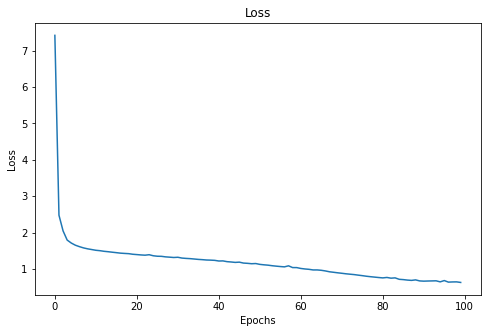

In [ ]:
# ЯЧЕЙКА 7

step = np.arange(0, num_epochs)

fig, ax = plt.subplots(figsize=(8,5))

# Рисуем зависимость ошибки от эпохи обучения
plt.plot(step, np.array(loss_test))

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()